# Loading .npy files

The exercises for this chapter will use a NumPy array holding an image in RGB format. Which image? You'll have to load the array from the `mystery_image.npy` file to find out!

numpy is loaded as `np`, and `mystery_image.npy` is available.

In [2]:
from PIL import Image
import numpy as np

img = Image.open('images/image.png')
data = np.array( img, dtype='uint8' )

np.save( "dataset/mystery_image.npy", data)

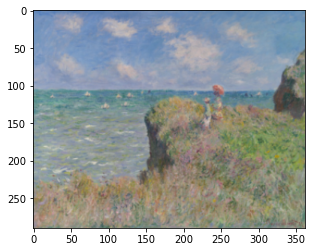

In [6]:
import matplotlib.pyplot as plt

# Load the mystery_image.npy file 
rgb_array = np.load("dataset/mystery_image.npy")

plt.imshow(rgb_array)
plt.show()

# Getting help

You'll need to use the `.astype()` array method we covered in the first chapter of this course for the next exercise. If you forget exactly how `.astype()` works, you could check out the course slides or NumPy's documentation on numpy.org. There is, however, an even faster way to jog your memory…

In [10]:
# Display the documentation for .astype()
help(np.ndarray.astype)

Help on method_descriptor:

astype(...)
    a.astype(dtype, order='K', casting='unsafe', subok=True, copy=True)
    
    Copy of the array, cast to a specified type.
    
    Parameters
    ----------
    dtype : str or dtype
        Typecode or data-type to which the array is cast.
    order : {'C', 'F', 'A', 'K'}, optional
        Controls the memory layout order of the result.
        'C' means C order, 'F' means Fortran order, 'A'
        means 'F' order if all the arrays are Fortran contiguous,
        'C' order otherwise, and 'K' means as close to the
        order the array elements appear in memory as possible.
        Default is 'K'.
    casting : {'no', 'equiv', 'safe', 'same_kind', 'unsafe'}, optional
        Controls what kind of data casting may occur. Defaults to 'unsafe'
        for backwards compatibility.
    
          * 'no' means the data types should not be cast at all.
          * 'equiv' means only byte-order changes are allowed.
          * 'safe' means only cas

# Update and save

Perhaps you are training a machine learning model to recognize ocean scenes. You'd like the model to understand that oceans are not only associated with bright, summery colors, so you're careful to include images of oceans in bad weather or evening light as well. You may have to manually transform some images in order to balance the data, so your task is to darken the Monet ocean scene `rgb_array`.

Recall from the video that white is associated with the maximum RGB value of 255, while darker colors are associated with lower values. numpy is loaded as np, and the 3D Monet `rgb_array` that you loaded in the last exercise is available.

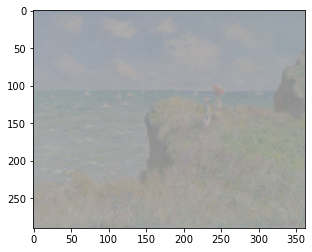

In [11]:
# Reduce every value in rgb_array by 50 percent
darker_rgb_array = rgb_array * 0.5

# Convert darker_rgb_array into an array of integers
darker_rgb_int_array = darker_rgb_array.astype(np.int8)
plt.imshow(darker_rgb_int_array)
plt.show()

# Save darker_rgb_int_array to an .npy file called darker_monet.npy
with open("dataset/darker_monet.npy", "wb") as f:
    np.save(f, darker_rgb_int_array)

# Augmenting Monet

Perhaps you're still working on that machine learning model that identifies ocean scenes in paintings. You'd like to generate a few extra images to augment your existing data. After all, a human can tell that a painting is of an ocean even if the painting is upside-down: why shouldn't your machine learning model?

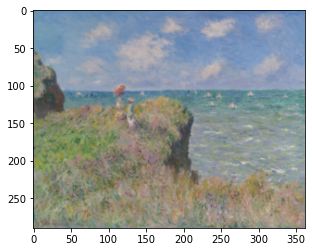

In [12]:
# Flip rgb_array so that it is the mirror image of the original
mirrored_monet = np.flip(rgb_array, axis=1)
plt.imshow(mirrored_monet)
plt.show()

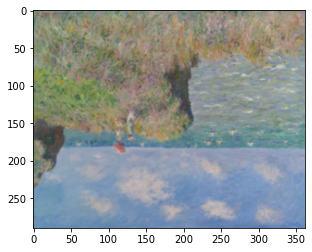

In [13]:
# Flip rgb_array so that it is upside down
upside_down_monet = np.flip(rgb_array, axis=(0, 1))
plt.imshow(upside_down_monet)
plt.show()

# Transposing your masterpiece

You've learned that transposing an array reverses the order of the array's axes. To transpose the axes in a different order, you can pass the desired axes order as arguments. You'll practice with the 3D Monet `rgb_array`,

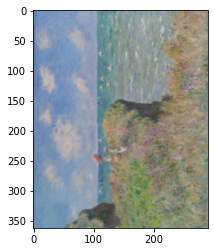

In [14]:
# Transpose rgb_array
transposed_rgb = np.transpose(rgb_array, axes=(1, 0, 2))
plt.imshow(transposed_rgb)
plt.show()

# 2D split and stack

Splitting and stacking skills aren't just useful with 3D RGB arrays: they are excellent for subsetting and organizing data of any type and dimension!

You'll now take a quick trip down memory lane to reorganize the `monthly_sales` array as a 3D array. Recall that the first dimension of `monthly_sales` is rows of a single month's sales across three industries, and the second dimension is columns of monthly sales data for a single industry.

Your task is to split this data into quarterly sales data and stack the quarterly sales data so that the new third dimension represents the four 2D arrays of quarterly sales.numpy is loaded as np, and the `monthly_sales` array is available.

In [15]:
monthly_sales = np.load("dataset/monthly_sales.npy")

# Split monthly_sales into quarterly data
q1_sales, q2_sales, q3_sales, q4_sales = np.split(monthly_sales, 4, axis=0)
print(q1_sales)

[[ 4134 23925  8657]
 [ 4116 23875  9142]
 [ 4673 27197 10645]]


In [16]:
# Split monthly_sales into quarterly data
q1_sales, q2_sales, q3_sales, q4_sales = np.split(monthly_sales, 4)

# Print q1_sales
print(q1_sales)

# Stack the four quarterly sales arrays
quarterly_sales = np.stack([q1_sales, q2_sales, q3_sales, q4_sales])
print(quarterly_sales)

[[ 4134 23925  8657]
 [ 4116 23875  9142]
 [ 4673 27197 10645]]
[[[ 4134 23925  8657]
  [ 4116 23875  9142]
  [ 4673 27197 10645]]

 [[ 4580 25637 10456]
  [ 5109 27995 11299]
  [ 5011 27419 10625]]

 [[ 5245 27305 10630]
  [ 5270 27760 11550]
  [ 4680 24988  9762]]

 [[ 4913 25802 10456]
  [ 5312 25405 13401]
  [ 6630 27797 18403]]]


# Splitting RGB data

Perhaps you'd like to better understand Monet's use of the color blue. Your task is to create a version of the Monet `rgb_array` that emphasizes parts of the painting that use lots of blue by making them even bluer! You'll perform the splitting portion of this task in this exercise and the stacking portion in the next.

numpy is loaded as np, and the Monet `rgb_array` is available.

In [20]:
rgb_array = np.load("dataset/rgb_array.npy")
# Split rgb_array into red, green, and blue arrays
red_array, green_array, blue_array = np.split(rgb_array, 3, axis=2)

# Create emphasized_blue_array
emphasized_blue_array = np.where(blue_array > blue_array.mean(), 255, blue_array)

# Print the shape of emphasized_blue_array
print(emphasized_blue_array.shape)



(675, 843, 1)


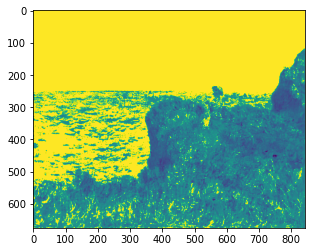

In [23]:
# Remove the trailing dimension from emphasized_blue_array
emphasized_blue_array_2D = emphasized_blue_array.reshape((675, 843))
plt.imshow(emphasized_blue_array_2D)

# Stacking RGB data

Now you'll combine `red_array`, `green_array`, and `emphasized_blue_array_2D` to see what Monet's painting looks like with the blues emphasized!

`numpy` is loaded as `np`, and the `red_array`, `green_array`, `blue_array` and `emphasized_blue_array_2D` objects that you created in the last exercise are available.

In [25]:
# Print the shapes of blue_array and emphasized_blue_array_2D
print(blue_array.shape, emphasized_blue_array_2D.shape)



(675, 843, 1) (675, 843)


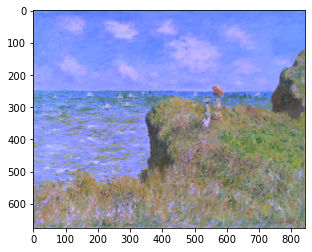

In [26]:
# Reshape red_array and green_array
red_array_2D = red_array.reshape((675, 843))
green_array_2D = green_array.reshape((675, 843))

# Stack red_array_2D, green_array_2D, and emphasized_blue_array_2D
emphasized_blue_monet = np.stack([red_array_2D, green_array_2D, emphasized_blue_array_2D], axis=2)
plt.imshow(emphasized_blue_monet)
plt.show()